In [6]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

tf.random.set_seed(0)
pd.set_option('display.max_columns', None)

In [7]:
start_date = "2024-10-07"
end_date = "2024-10-09"
sampling_rate = "200ms"

In [8]:
from data_preprocessing import process_and_combine_data

all_data = process_and_combine_data(start_date, end_date, data_folder="AAPL_data", sampling_rate=sampling_rate)

print(all_data.columns)

all_data.head()

Index(['mid_price_first', 'mid_price_last', 'mid_price_high', 'mid_price_low',
       'mid_price_mean', 'std_mid_price', 'weighted_mid_price_first',
       'weighted_mid_price_last', 'weighted_mid_price_mean', 'last_spread',
       'mean_spread', 'std_spread', 'last_best_bid_price',
       'mean_best_bid_price', 'last_best_ask_price', 'mean_best_ask_price',
       'last_best_bid_size', 'mean_best_bid_size', 'std_best_bid_size',
       'last_best_ask_size', 'mean_best_ask_size', 'std_best_ask_size',
       'mean_second_ask_price', 'mean_second_bid_price', 'mid_price_variation',
       'mid_price_variation_class', 'mean_mid_price_variation',
       'mean_mid_price_variation_class',
       'next_5_mean_mid_price_variation_class', 'weighted_mid_price_variation',
       'weighted_mid_price_variation_class', 'total_bid_volume',
       'total_ask_volume', 'mean_order_book_imbalance',
       'last_order_book_imbalance', 'total_net_order_flow', 'num_added_orders',
       'num_canceled_orders', 

,mid_price_first,mid_price_last,mid_price_high,mid_price_low,mid_price_mean,std_mid_price,weighted_mid_price_first,weighted_mid_price_last,weighted_mid_price_mean,last_spread,mean_spread,std_spread,last_best_bid_price,mean_best_bid_price,last_best_ask_price,mean_best_ask_price,last_best_bid_size,mean_best_bid_size,std_best_bid_size,last_best_ask_size,mean_best_ask_size,std_best_ask_size,mean_second_ask_price,mean_second_bid_price,mid_price_variation,mid_price_variation_class,mean_mid_price_variation,mean_mid_price_variation_class,next_5_mean_mid_price_variation_class,weighted_mid_price_variation,weighted_mid_price_variation_class,total_bid_volume,total_ask_volume,mean_order_book_imbalance,last_order_book_imbalance,total_net_order_flow,num_added_orders,num_canceled_orders,num_traded_orders,order_book_imbalance_5s,order_flow_5s,bid_volume_variation,ask_volume_variation,bid_price_variation,ask_price_variation,trade_open,trade_close,trade_high,trade_low,ADX_5,ADX_7,ADX_10,DMP_5,DMP_10,DMN_5,DMN_10,AROONU_7,AROOND_7,OLL3,OLL5,OLL10,OLL15,OHH3,OHH5,STOCHk_7_3_3,STOCHd_7_3_3,MACD_8_21_5,RSI_7,AO_5_10,EMA_15,HMA_10,KAMA_3_2_10,MA_10,MA_20,rmCO(3),rmCO(4),rmCO(5),rmCO(6),Bollinger_Upper,Bollinger_Lower,U_minus_L,MA20dSTD,CO,C1O1,C2O2,C3O3,range,OH1,time_since_open,is_monday,is_tuesday,is_wednesday,is_thursday,is_friday
ts_recv,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2024-10-07 09:30:06.800000-04:00,224.595,224.670,224.675,224.585,224.626880,0.030384,224.594254,224.674872,224.625723,0.02,0.027094,0.012802,224.66,224.613333,224.68,224.640427,145.0,156.059829,104.005246,50.0,166.581197,77.515987,224.651026,224.602308,0.000334,2.0,0.000142,1,1,0.000359,1,809,-700,-0.030994,0.487179,95,50,49,18,-0.148241,-61.8,-46.0,-161.0,0.0,0.0,224.58,224.68,224.68,224.58,27.680190,27.752182,34.170009,38.634797,36.162467,16.432995,19.003741,14.285714,28.571429,0.050,0.06,0.095,0.135,0.080,0.080,79.069767,56.302663,-0.001513,61.500275,-0.02600,224.573338,224.595507,224.597160,224.611132,224.547466,0.040000,0.02250,0.026,0.021667,224.733563,224.361370,0.372193,0.099136,0.075,-0.010,0.055,-0.030,0.090,0.005,6.8,1,0,0,0,0
2024-10-07 09:30:07-04:00,224.675,224.755,224.760,224.675,224.728010,0.025649,224.671013,224.755469,224.728242,0.03,0.029529,0.008961,224.74,224.713246,224.77,224.742775,66.0,136.984293,88.997781,62.0,138.455497,100.028927,224.754398,224.702932,0.000356,2.0,0.000236,1,1,0.000376,1,1198,-465,-0.007261,0.031250,4,81,74,36,-0.157060,-6.2,-79.0,12.0,0.0,0.0,224.69,224.75,224.76,224.69,34.623527,31.172793,35.272248,52.868840,43.771101,12.241821,16.522828,100.000000,14.285714,0.110,0.13,0.175,0.215,0.085,0.085,98.076923,73.777579,0.008867,74.095182,-0.00075,224.592672,224.616758,224.655316,224.619619,224.566261,0.048333,0.05000,0.034,0.035000,224.745442,224.387080,0.358362,0.097853,0.080,0.075,-0.010,0.055,0.085,0.080,7.0,1,0,0,0,0
2024-10-07 09:30:07.200000-04:00,224.755,224.775,224.785,224.755,224.766463,0.009702,224.755469,224.787122,224.764716,0.03,0.023415,0.008919,224.76,224.754756,224.79,224.778171,245.0,64.402439,44.656953,26.0,109.658537,70.356450,224.790122,224.744756,0.000089,2.0,0.000051,1,0,0.000141,1,297,16,-0.258530,0.808118,219,33,27,22,-0.148139,72.4,179.0,-36.0,0.0,0.0,224.75,224.78,224.78,224.75,41.078619,34.705604,36.607584,55.795289,45.595763,11.065860,15.760773,100.000000,0.000000,0.170,0.21,0.255,0.255,0.030,0.030,96.000000,91.048897,0.015604,77.378115,0.03100,224.614396,224.643457,224.704715,224.626466,224.584770,0.058333,0.04125,0.044,0.031667,224.766357,224.403183,0.363174,0.093379,0.020,0.080,0.075,-0.010,0.030,0.085,7.2,1,0,0,0,0
2024-10-07 09:30:07.400000-04:00,224.775,224.775,224.775,224.750,224.761923,0.008631,224.787122,224.789577,224.765370,0.03,0.034615,0.005547,224.76,224.744615,224.79,224.779231,70.0,248.256410,195.896014,1.0,142.461538,99.558194,224.789231,224.734615,0.000000,1.0,-0.000058,0,0,0.000011,1,396,-125,0.271295,0.971831,69,17,17,5,-0.060380,73.4,

<Axes: >

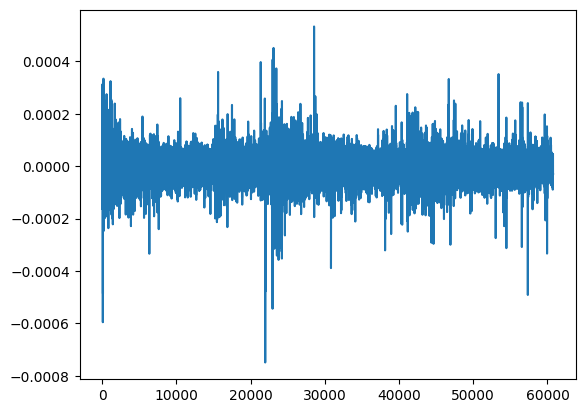

In [9]:
mean_mid_price_variations = all_data["mean_mid_price_variation"]
mean_mid_price_variations = mean_mid_price_variations.reset_index(drop=True)

mean_mid_price_variations.plot()

In [10]:
from statsmodels.tsa.stattools import adfuller

# Perform the Augmented Dickey-Fuller test
adf_result = adfuller(mean_mid_price_variations)

# Print the results
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
print("Critical Values:")
for key, value in adf_result[4].items():
    print(f"   {key}: {value}")

# Interpretation
if adf_result[1] < 0.05:
    print("The series is stationary (reject the null hypothesis).")
else:
    print("The series is not stationary (fail to reject the null hypothesis).")

ADF Statistic: -61.80579344322756
p-value: 0.0
Critical Values:
   1%: -3.4304576615253146
   5%: -2.8615875843685674
   10%: -2.566795327553337
The series is stationary (reject the null hypothesis).


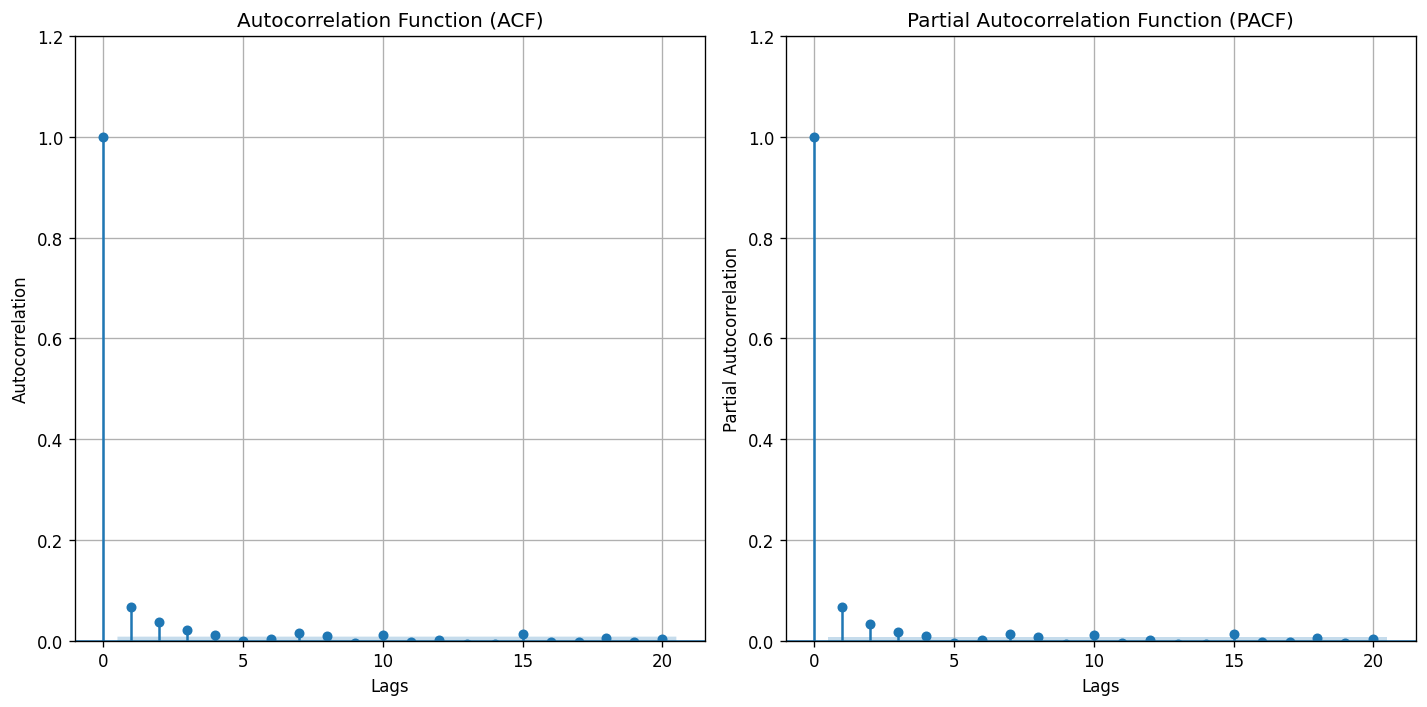

In [11]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Update plot parameters
plt.rcParams.update({'figure.figsize': (12, 6), 'figure.dpi': 120})

# Create subplots for ACF and PACF
fig, axes = plt.subplots(1, 2)

# Plot the ACF of the mean_mid_price_variations series with fewer lags
plot_acf(mean_mid_price_variations.values, ax=axes[0], lags=20)
axes[0].set_title('Autocorrelation Function (ACF)')
axes[0].set_xlabel('Lags')
axes[0].set_ylabel('Autocorrelation')
axes[0].grid(True)
axes[0].set(ylim=(0, 1.2))

# Plot the PACF of the mean_mid_price_variations series with fewer lags
plot_pacf(mean_mid_price_variations.values, ax=axes[1], lags=20)
axes[1].set_title('Partial Autocorrelation Function (PACF)')
axes[1].set_xlabel('Lags')
axes[1].set_ylabel('Partial Autocorrelation')
axes[1].grid(True)
axes[1].set(ylim=(0, 1.2))

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [12]:
from sklearn.metrics import accuracy_score
from statsmodels.tsa.arima.model import ARIMA

train_size = int(len(mean_mid_price_variations) * 0.8)
train, test = mean_mid_price_variations[:train_size], mean_mid_price_variations[train_size:]

p, d, q = 1, 1, 1  # Example parameters, adjust as needed
model = ARIMA(train.dropna(), order=(p, d, q))  # Drop NaN values if any
model_fit = model.fit()

predictions = []

# Iterate over the test data and forecast one step ahead at a time
history = list(train.dropna().values)  # Training data as history
for t in range(len(test)):
    # Fit the ARIMA model on the history
    model = ARIMA(history, order=(p, d, q))
    model_fit = model.fit()

    # Forecast the next value
    yhat = model_fit.forecast(steps=1)[0]
    predictions.append(yhat)

    # Append the actual test value to the history for the next iteration
    history.append(test.iloc[t])

# Convert predictions to binary values (1 for positive, 0 for negative)
predicted_labels = (np.array(predictions) > 0).astype(int)

actual_labels = (test > 0).astype(int)

# Calculate the accuracy of the predictions
accuracy = accuracy_score(actual_labels, predicted_labels)
print(f"Accuracy of the predictions: {accuracy * 100:.2f}%")

KeyboardInterrupt: 